<a href="https://colab.research.google.com/github/Nivedha-Jayanth/AI-Powered-report-generator/blob/main/EV_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/content/EV_DATA.csv')
df.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


# **Cleaning and handling the missing values**

In [4]:
# 1. Removing the spaces in text columns using strip()

df=df.apply(lambda x:x.str.strip() if x.dtype=='object' else x)


In [5]:
# 2. Changing the column heads without spaces.

df.columns=df.columns.str.replace(" ","")
df.head()

,Carfullname,Make,Model,Minimalprice(gross)[PLN],Enginepower[KM],Maximumtorque[Nm],Typeofbrakes,Drivetype,Batterycapacity[kWh],Range(WLTP)[km],...,Permissablegrossweight[kg],Maximumloadcapacity[kg],Numberofseats,Numberofdoors,Tiresize[in],Maximumspeed[kph],Bootcapacity(VDA)[l],Acceleration0-100kph[s],MaximumDCchargingpower[kW],mean-Energyconsumption[kWh/100km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Carfullname                        53 non-null     object 
 1   Make                               53 non-null     object 
 2   Model                              53 non-null     object 
 3   Minimalprice(gross)[PLN]           53 non-null     int64  
 4   Enginepower[KM]                    53 non-null     int64  
 5   Maximumtorque[Nm]                  53 non-null     int64  
 6   Typeofbrakes                       52 non-null     object 
 7   Drivetype                          53 non-null     object 
 8   Batterycapacity[kWh]               53 non-null     float64
 9   Range(WLTP)[km]                    53 non-null     int64  
 10  Wheelbase[cm]                      53 non-null     float64
 11  Length[cm]                         53 non-null     float64
 

In [7]:
# 3. Filling the blank space in the column "type of breaks". As there is one value missing in categorical column, filling it using mode (Most frequently used break type in the data).

df['Typeofbrakes']=df['Typeofbrakes'].fillna(df['Typeofbrakes'].mode()[0])


In [8]:
# 4. Filling the missing values in columns using median value (Permissablegrossweight[kg], Maximumloadcapacity[kg], Bootcapacity(VDA)[l], Acceleration0-100kph[s], mean-Energyconsumption[kWh/100km])

df=df.fillna(df.median(numeric_only=True))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Carfullname                        53 non-null     object 
 1   Make                               53 non-null     object 
 2   Model                              53 non-null     object 
 3   Minimalprice(gross)[PLN]           53 non-null     int64  
 4   Enginepower[KM]                    53 non-null     int64  
 5   Maximumtorque[Nm]                  53 non-null     int64  
 6   Typeofbrakes                       53 non-null     object 
 7   Drivetype                          53 non-null     object 
 8   Batterycapacity[kWh]               53 non-null     float64
 9   Range(WLTP)[km]                    53 non-null     int64  
 10  Wheelbase[cm]                      53 non-null     float64
 11  Length[cm]                         53 non-null     float64
 

In [20]:
df.head()

,Carfullname,Make,Model,Minimalprice(gross)[PLN],Enginepower[KM],Maximumtorque[Nm],Typeofbrakes,Drivetype,Batterycapacity[kWh],Range(WLTP)[km],...,Permissablegrossweight[kg],Maximumloadcapacity[kg],Numberofseats,Numberofdoors,Tiresize[in],Maximumspeed[kph],Bootcapacity(VDA)[l],Acceleration0-100kph[s],MaximumDCchargingpower[kW],mean-Energyconsumption[kWh/100km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


**Explanation:**


*   Removed the spaces in text columns using strip() function.

*   Renamed the column heads without spaces. Replaced the spaces using str.replace method.
*   Filled the blank space in the column "type of breaks". As there is one value missing in categorical column, filled it using mode function which fills with the most frequently used break type in the data.



*   Filled the missing values in columns (Permissablegrossweight[kg], Maximumloadcapacity[kg], Bootcapacity(VDA)[l], Acceleration0-100kph[s], mean-Energyconsumption[kWh/100km]) using median value, as it is better if any outliers present in the data.



# **Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km**

#**A. Your task is to filter out EVs that meet these criteria**

In [10]:
df_filtered=df[(df['Minimalprice(gross)[PLN]']<=350000)&(df['Range(WLTP)[km]']>=400)]
df_filtered[['Carfullname', 'Make','Model','Minimalprice(gross)[PLN]','Range(WLTP)[km]']]

,Carfullname,Make,Model,Minimalprice(gross)[PLN],Range(WLTP)[km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,438
8,BMW iX3,BMW,iX3,282900,460
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,449
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,455
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,452
22,Mercedes-Benz EQC,Mercedes-Benz,EQC,334700,414
39,Tesla Model 3 Standard Range Plus,Tesla,Model 3 Standard Range Plus,195490,430
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,580
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,567
47,Volkswagen ID.3 Pro Performance,Volkswagen,ID.3 Pro Performance,155890,425


**Explanation:**

Filterd the data based on the criteria where budget (Minimalprice(gross)[PLN]) should be less than 350000 and minimum Range(WLTP)[km] should be 400.

**Insights:**

*   Dataframe has 12 EVs that match these criteria.

*   Tesla and Volkswagen are providing the most vehicles in this range for the given budget.





#**B. Group them by the manufacturer (Make)**

In [11]:
grouped=df_filtered.groupby('Make')
grouped_data=grouped.size().reset_index(name="count")
grouped_data

,Make,count
0,Audi,1
1,BMW,1
2,Hyundai,1
3,Kia,2
4,Mercedes-Benz,1
5,Tesla,3
6,Volkswagen,3


**Explanation:**

Using pandas groupby function, grouped the EVs based on the manufacturer(Make) from the filtered dataframe which follows the criteria.

#**C. Calculate the average battery capacity for each manufacturer**

In [12]:
avg_battery_cap=grouped['Batterycapacity[kWh]'].mean().reset_index(name="Avg_battery_capacity")
avg_battery_cap

,Make,Avg_battery_capacity
0,Audi,95.000000
1,BMW,80.000000
2,Hyundai,64.000000
3,Kia,64.000000
4,Mercedes-Benz,80.000000
5,Tesla,68.000000
6,Volkswagen,70.666667


 **Explanation:**

From the filtered data, calculated the mean of grouped EVs battery capacity corresponding to their Manufacturer.

 **Insights:**


*   Audi, BMW, Mercedes having larger batteries and prioritize performance and range.
*   Tesla has smaller batteries but highly efficient for tech-driven strategy


*   Hyundai and Kia having smaller batteries but has affordable EVs.
*   Volkswagen positioned in between with balancing range, efficiency, and affordability.

# **Task 2: You suspect some EVs have unusually high or low energy consumption.**
**Find the outliers in the mean - Energy consumption [kWh/100 km] column.**

In [13]:
Q1=df['mean-Energyconsumption[kWh/100km]'].quantile(0.25)
Q3=df['mean-Energyconsumption[kWh/100km]'].quantile(0.75)
IQR=Q3-Q1
Lower_bound=Q1-1.5*IQR
Upper_bound=Q3+1.5*IQR
Outliers=df[(df['mean-Energyconsumption[kWh/100km]']<Lower_bound)|(df['mean-Energyconsumption[kWh/100km]']>Upper_bound)]
outliers_count=Outliers['mean-Energyconsumption[kWh/100km]'].count()
print(f"Outliers in mean-Energy consumption: {outliers_count}")

Outliers in mean-Energy consumption: 0


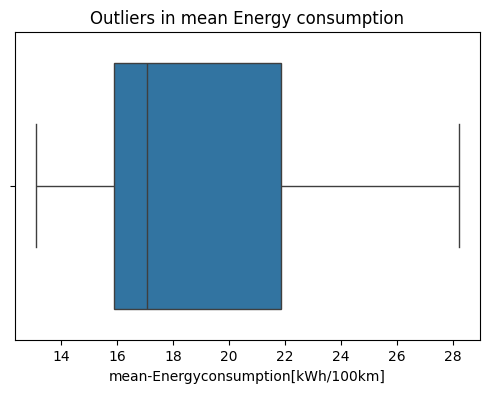

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x='mean-Energyconsumption[kWh/100km]', data=df)
plt.title("Outliers in mean Energy consumption")
plt.show()

**Explanation:**


Q1 (25th percentile) = the value below which 25% of data lies.

Q3 (75th percentile) = the value below which 75% of data lies.

IQR (Interquartile Range) = Q3 – Q1 → this measures the "spread" of the middle 50% of the data.

**To calculate the outliers:**

Lower_bound = Q1 - 1.5 * IQR

Upper_bound = Q3 + 1.5 * IQR

Any data below Lower_bound or above Upper_bound is considered an outlier (Tukey's rule)

Then filtered and counted the rows where energy consumption is outside the lower or upper bound.





 **Insight:**

Using the IQR method and boxplot visualization, no unusual EVs with extremely high or low energy consumption were detected. The distribution appears balanced, with all values lying within the expected range.


# **Task 3: Your manager wants to know if there's a strong relationship between battery capacity and range**

#**A. Create a suitable plot to visualize.**

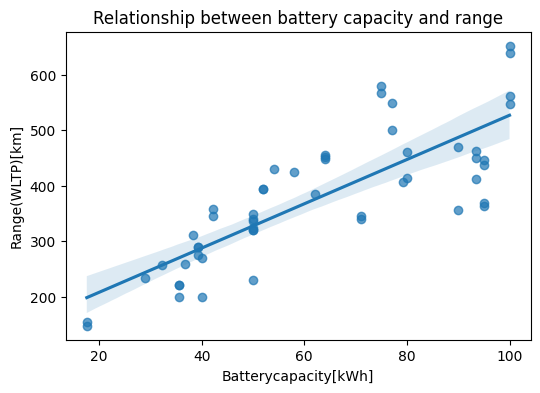

In [15]:
plt.figure(figsize=(6,4))
sns.regplot(x='Batterycapacity[kWh]',y='Range(WLTP)[km]', data=df, scatter_kws={'alpha':0.7})
plt.title("Relationship between battery capacity and range")
plt.show()

#**Correlation coefficient between battery capacity and range**

In [16]:
correlation=df['Batterycapacity[kWh]'].corr(df['Range(WLTP)[km]'])
print("The correlation between battery capacity and range:",correlation)

The correlation between battery capacity and range: 0.8104385771936846


 **Explanation:**
    

*   The blue regression line shows the general trend, as battery capacity increases, the driving range also increases.


*   The shaded area is confidence interval, we can be fairly confident about the trend.


*   Calculated Correlation coefficient (r) = 0.81 using corr function.






#**B. Highlight any insights**

 **Insights:**


*   The scatter plot shows a positive relationship between battery capacity (kWh)
and range (WLTP km).
*   The correlation coefficient between battery capacity and range is 0.81, indicating a strong positive relationship. This means EVs with larger batteries tend to have significantly longer ranges

*   The regression line confirms this upward trend, with only a few models deviating from the line.
*   This suggests that there is a strong relationship between battery capacity and range.
















# **Task 4: Build an EV recommendation class.**

**The class should allow users to input their budget, desired range, and battery capacity. The class should then return the top three EVs matching their criteria.**

In [17]:
class EVrecommender():
  def __init__(self,data):
    self.df=data


  def recommended(self,budget,range,battery):
    recommended=self.df[(self.df['Minimalprice(gross)[PLN]']<=budget)&(self.df['Range(WLTP)[km]']>=range)&(self.df['Batterycapacity[kWh]']>=battery)]
    sorted=recommended.sort_values(by='Range(WLTP)[km]', ascending=False)
    Top_3=sorted.head(3)
    return Top_3[['Carfullname','Make','Model','Minimalprice(gross)[PLN]','Batterycapacity[kWh]','Range(WLTP)[km]','mean-Energyconsumption[kWh/100km]']]



In [18]:
person=EVrecommender(df)
bgt=float(input("Enter the budget:"))
rng=float(input("Enter the minimum range:"))
bat=float(input("Enter the minimum battery capacity:"))
rec=person.recommended(bgt,rng,bat)
if rec.empty:
  print("Sorry, no match is found")
else:
  print("\nYour EV recommendations:\n",rec.to_string(index=False))

Enter the budget:300000
Enter the minimum range:400
Enter the minimum battery capacity:70

Your EV recommendations:
               Carfullname       Make               Model  Minimalprice(gross)[PLN]  Batterycapacity[kWh]  Range(WLTP)[km]  mean-Energyconsumption[kWh/100km]
 Tesla Model 3 Long Range      Tesla  Model 3 Long Range                    235490                  75.0              580                              17.05
Tesla Model 3 Performance      Tesla Model 3 Performance                    260490                  75.0              567                              17.05
    Volkswagen ID.3 Pro S Volkswagen          ID.3 Pro S                    179990                  77.0              549                              15.90


 **Explanation:**
*   EV recommendations class is created which shows top 3 EVs matching the given criteria by user, if there is no match as per the criteria then it shows "Sorry, no match is found".

*   Here in output we can see the recommended function shows top 3 EVs as per user need, showing the maximum range(WLTP) for given price range at top.


*   This helps the user to choose the best EV as per their need.






 **Insights:**
    

*   Tesla dominates premium long-range EVs. Strong balance of large battery, high range, and competitive energy efficiency
*   Volkswagen ID.3 Pro S also meets the criteria. It’s also cheaper (179,990 PLN) compared to Tesla models.



# **Task 5: Inferential Statistics – Hypothesis Testing**

**Test whether there is a significant difference in the average Engine power [KM] of vehicles manufactured by two leading manufacturers i.e. Tesla and Audi. What insights can you draw from the test results? Recommendations and Conclusion: Provide actionable insights based on your analysis. (Conduct a two sample t-test using ttest_ind from scipy.stats module).**

In [19]:
from scipy.stats import ttest_ind
tesla=df[df['Make']=="Tesla"]['Enginepower[KM]']
audi=df[df['Make']=="Audi"]['Enginepower[KM]']

t_stat,p_value=ttest_ind(tesla,audi,equal_var=False)
print("T-statistics",t_stat)
print("p-value",p_value)

alpha=0.05
if p_value<alpha:
  print("Reject Null Hypothesis: Significant difference in average engine power between Tesla and Audi.")
else:
  print("Fail to Reject Null Hypothesis: No significant difference in average engine power between Tesla and Audi.")


T-statistics 1.7939951827297178
p-value 0.10684105068839565
Fail to Reject Null Hypothesis: No significant difference in average engine power between Tesla and Audi.


 **Explanation:**
     

*   The null hypothesis (H₀): Tesla and Audi vehicles have the same average engine power.
*   The alternative hypothesis (H₁): Tesla and Audi vehicles have different average engine power.

 Since the p-value (0.1068) > 0.05, there isn’t enough statistical evidence to say that Tesla and Audi differ significantly in average engine power.


      
        

      

 **Insights:**

The t-test result suggests that both manufacturers are competing closely in terms of raw engine output.

# **Link for project explanation:**
https://drive.google.com/file/d/1CBeAA8__CVQW-wBYDBNSOjO4lxeCYw4O/view?usp=sharing